In [1]:
%matplotlib inline
%pylab inline

import numpy as np
import pandas as pd

from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1000)

train_all = pd.read_csv('./data/train.csv')
test_all = pd.read_csv('./data/test.csv')

train_all.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train = train_all
test = test_all
#train['Age'].value_counts()

#### Identificação das variáveis que serão passadas para pd.get_dummies

In [5]:
cat_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cat_vars:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

#train['Cabin'] = train['Cabin'].astype(str)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(2), object(3)
memory usage: 54.2+ KB


In [7]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
           'Embarked']
train.head()

PassengerId  Survived Pclass  \
0            1         0      3   
1            2         1      1   
2            3         1      3   
3            4         1      1   
4            5         0      3   

                                                Name     Sex   Age SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0     1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0     1   
2                             Heikkinen, Miss. Laina  female  26.0     0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0     1   
4                           Allen, Mr. William Henry    male  35.0     0   

  Parch            Ticket     Fare Cabin Embarked  
0     0         A/5 21171   7.2500   NaN        S  
1     0          PC 17599  71.2833   C85        C  
2     0  STON/O2. 3101282   7.9250   NaN        S  
3     0            113803  53.1000  C123        S  
4     0            373450   8.0500   NaN        S

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 22.8+ KB


In [9]:
train = pd.get_dummies(train[features])
test = pd.get_dummies(test[features])

test.head(10)

Age  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0  34.5         0         0         1           0         1        1        0   
1  47.0         0         0         1           1         0        0        1   
2  62.0         0         1         0           0         1        1        0   
3  27.0         0         0         1           0         1        1        0   
4  22.0         0         0         1           1         0        0        1   
5  14.0         0         0         1           0         1        1        0   
6  30.0         0         0         1           1         0        1        0   
7  26.0         0         1         0           0         1        0        1   
8  18.0         0         0         1           1         0        1        0   
9  21.0         0         0         1           0         1        0        0   

   SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0        0        0        0        0        0        1        0        0   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        0        1        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        0        0        0        1        0   
5        0        0        0        0        0        1        0        0   
6        0        0        0        0        0        1        0        0   
7        0        0        0        0        0        0        1        0   
8        0        0        0        0        0        1        0        0   
9        1        0        0        0        0        1        0        0   

   Parch_3  Parch_4  Parch_5  Parch_6  Parch_9  Embarked_C  Embarked_Q  \
0        0        0        0        0        0           0           1   
1        0        0        0        0        0           0           0   
2        0        0        0        0        0           0           1   
3        0        0        0        0        0           0           0   
4        0        0        0        0        0           0           0   
5        0        0        0        0        0           0           0   
6        0        0        0        0        0           0           1   
7        0        0        0        0        0           0           0   
8        0        0        0        0        0           1           0   
9        0        0        0        0        0           0           0   

   Embarked_S  
0           0  
1           1  
2           0  
3           1  
4           1  
5           1  
6           0  
7           1  
8           0  
9           1

### Diferenciando algumas pessoas pelo nome.
Talvez seja possível deduzir que algumas pessoas (como militares) possuam alguma característica que tenha influenciado na sobrevivência ou morte, como treinamento para resgate de pessoas.

In [10]:
train['Nome_contem_Miss'] = train_all['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train_all['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train_all['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train_all['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train_all['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train_all['Name'].str.contains("Mr").astype(int)

test['Nome_contem_Miss'] = test_all['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test_all['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = test_all['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test_all['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test_all['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test_all['Name'].str.contains("Mr").astype(int)

### Preenchendo dados faltantes  referente a Cabine
Todas as cabines são indicadas através de uma letra e um número. Foi definida a letra *Z* e o número *0* para os preencher os valores faltantes.

In [11]:
train['Cabine'] = train_all['Cabin'].fillna('Z0')
test['Cabine'] = test_all['Cabin'].fillna('Z0')

train['Cabine'].head(10)

0      Z0
1     C85
2      Z0
3    C123
4      Z0
5      Z0
6     E46
7      Z0
8      Z0
9      Z0
Name: Cabine, dtype: object

In [12]:
np.array(test['Cabine']).T

array(['Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0',
       'Z0', 'B45', 'Z0', 'E31', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0',
       'Z0', 'Z0', 'B57 B59 B63 B66', 'Z0', 'B36', 'Z0', 'A21', 'Z0',
       'Z0', 'Z0', 'Z0', 'Z0', 'C78', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0',
       'D34', 'Z0', 'Z0', 'D19', 'Z0', 'A9', 'Z0', 'D15', 'Z0', 'C31',
       'Z0', 'Z0', 'C23 C25 C27', 'Z0', 'Z0', 'Z0', 'F G63', 'Z0', 'B61',
       'Z0', 'Z0', 'Z0', 'Z0', 'B57 B59 B63 B66', 'Z0', 'Z0', 'Z0', 'C53',
       'C23 C25 C27', 'Z0', 'Z0', 'Z0', 'D43', 'C130', 'C132', 'Z0',
       'C101', 'Z0', 'Z0', 'Z0', 'C55 C57', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0',
       'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'B71', 'Z0', 'Z0', 'Z0', 'C46', 'Z0',
       'Z0', 'Z0', 'C116', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0',
       'F', 'Z0', 'Z0', 'A29', 'Z0', 'C55 C57', 'Z0', 'Z0', 'G6', 'C6',
       'Z0', 'Z0', 'Z0', 'C28', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0',
       'Z0', 'C51', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0',

### Separando as informações das cabines


In [13]:
train['letra_cabine'] = train['Cabine'].apply(lambda x: x.split()[0][0])
train['numero_cabine'] = train['Cabine'].apply(lambda x: x.split()[0][1:])

test['letra_cabine'] = test['Cabine'].apply(lambda x: x.split()[0][0])
test['numero_cabine'] = test['Cabine'].apply(lambda x: x.split()[0][1:])

### Algumas cabines não possuem numeração
Algumas cabines no dataset não apresentam numeração. Dessa forma, a estratégia utilizada foi definir o número *-1* para esses casos. A função *convert_int* realiza a verificação e a atribuição do novo valor.

In [14]:
def convert_int(val):
    try:
        val = int(val)
    except:
        val = -1
    
    return val

In [15]:
train['numero_cabine'] = train['numero_cabine'].apply(lambda x: convert_int(x))
test['numero_cabine'] = test['numero_cabine'].apply(lambda x: convert_int(x))

In [16]:
train['letra_cabine'].value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: letra_cabine, dtype: int64

In [17]:
train.head()

Age  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0  22.0         0         0         1           0         1        0        1   
1  38.0         1         0         0           1         0        0        1   
2  26.0         0         0         1           1         0        1        0   
3  35.0         1         0         0           1         0        0        1   
4  35.0         0         0         1           0         1        1        0   

   SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0        0        0        0        0        0        1        0        0   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        0        1        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        0        0        1        0        0   

   Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0        0        0        0        0           0           0           1   
1        0        0        0        0           1           0           0   
2        0        0        0        0           0           0           1   
3        0        0        0        0           0           0           1   
4        0        0        0        0           0           0           1   

   Nome_contem_Miss  Nome_contem_Mrs  Nome_contem_Master  Nome_contem_Col  \
0                 0                0                   0                0   
1                 0                1                   0                0   
2                 1                0                   0                0   
3                 0                1                   0                0   
4                 0                0                   0                0   

   Nome_contem_Major  Nome_contem_Mr Cabine letra_cabine  numero_cabine  
0                  0               1     Z0            Z              0  
1                  0               1    C85            C             85  
2                  0               0     Z0            Z              0  
3                  0               1   C123            C            123  
4                  0               1     Z0            Z              0

In [18]:
train.head()

Age  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0  22.0         0         0         1           0         1        0        1   
1  38.0         1         0         0           1         0        0        1   
2  26.0         0         0         1           1         0        1        0   
3  35.0         1         0         0           1         0        0        1   
4  35.0         0         0         1           0         1        1        0   

   SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0        0        0        0        0        0        1        0        0   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        0        1        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        0        0        1        0        0   

   Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0        0        0        0        0           0           0           1   
1        0        0        0        0           1           0           0   
2        0        0        0        0           0           0           1   
3        0        0        0        0           0           0           1   
4        0        0        0        0           0           0           1   

   Nome_contem_Miss  Nome_contem_Mrs  Nome_contem_Master  Nome_contem_Col  \
0                 0                0                   0                0   
1                 0                1                   0                0   
2                 1                0                   0                0   
3                 0                1                   0                0   
4                 0                0                   0                0   

   Nome_contem_Major  Nome_contem_Mr Cabine letra_cabine  numero_cabine  
0                  0               1     Z0            Z              0  
1                  0               1    C85            C             85  
2                  0               0     Z0            Z              0  
3                  0               1   C123            C            123  
4                  0               1     Z0            Z              0

### Gerando variáveis do tipo dummy para as novas categorias de cabine
Ao separar as letras e números das cabines, uma nova variável categórica foi criada. Essa nova variável também foi passada pela função *get_dummies()*.
COmo efeito colateral desse processo, foi constatado que o dataset de teste não possuía nenhum registro de cabines do tipo `T`. Dessa forma, foi necessário incluir manualmente essa variável no dataset de testes.

In [19]:
df = pd.get_dummies(train['letra_cabine'], prefix='letra_cabine')
dfTest = pd.get_dummies(test['letra_cabine'], prefix='letra_cabine')
# Adicionando a coluna letra_cabine_T que não foi gerada em get_dummines pq a base de teste não possui cabines T.
dfTest['letra_cabine_T'] = 0

In [20]:
dfTest.head()

letra_cabine_A  letra_cabine_B  letra_cabine_C  letra_cabine_D  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   letra_cabine_E  letra_cabine_F  letra_cabine_G  letra_cabine_Z  \
0               0               0               0               1   
1               0               0               0               1   
2               0               0               0               1   
3               0               0               0               1   
4               0               0               0               1   

   letra_cabine_T  
0               0  
1               0  
2               0  
3               0  
4               0

In [21]:
train = pd.concat([train, df], axis=1)
test = pd.concat([test, dfTest], axis=1)
test.head(20)

Age  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  \
0   34.5         0         0         1           0         1        1   
1   47.0         0         0         1           1         0        0   
2   62.0         0         1         0           0         1        1   
3   27.0         0         0         1           0         1        1   
4   22.0         0         0         1           1         0        0   
5   14.0         0         0         1           0         1        1   
6   30.0         0         0         1           1         0        1   
7   26.0         0         1         0           0         1        0   
8   18.0         0         0         1           1         0        1   
9   21.0         0         0         1           0         1        0   
10   NaN         0         0         1           0         1        1   
11  46.0         1         0         0           0         1        1   
12  23.0         1         0         0           1         0        0   
13  63.0         0         1         0           0         1        0   
14  47.0         1         0         0           1         0        0   
15  24.0         0         1         0           1         0        0   
16  35.0         0         1         0           0         1        1   
17  21.0         0         0         1           0         1        1   
18  27.0         0         0         1           1         0        0   
19  45.0         0         0         1           1         0        1   

    SibSp_1  SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  \
0         0        0        0        0        0        0        1        0   
1         1        0        0        0        0        0        1        0   
2         0        0        0        0        0        0        1        0   
3         0        0        0        0        0        0        1        0   
4         1        0        0        0        0        0        0        1   
5         0        0        0        0        0        0        1        0   
6         0        0        0        0        0        0        1        0   
7         1        0        0        0        0        0        0        1   
8         0        0        0        0        0        0        1        0   
9         0        1        0        0        0        0        1        0   
10        0        0        0        0        0        0        1        0   
11        0        0        0        0        0        0        1        0   
12        1        0        0        0        0        0        1        0   
13        1        0        0        0        0        0        1        0   
14        1        0        0        0        0        0        1        0   
15        1        0        0        0        0        0        1        0   
16        0        0        0        0        0        0        1        0   
17        0        0        0        0        0        0        1        0   
18        1        0        0        0        0        0        1        0   
19        0        0        0        0        0        0        1        0   

    Parch_2  Parch_3  Parch_4  Parch_5  Parch_6  Parch_9  Embarked_C  \
0         0        0        0        0        0        0           0   
1         0        0        0        0        0        0           0   
2         0        0        0        0        0        0           0   
3         0        0        0        0        0        0           0   
4         0        0        0        0        0        0           0   
5         0        0        0        0        0        0           0   
6         0        0        0        0        0        0           0   
7         0        0        0        0        0        0           0   
8         0        0        0        0        0        0           1   
9         0        0        0        0        0        0           0   
10        0        0        0        0  

### Preenchimento das idades faltantes
As idades faltantes foram preenchidas pela média das idades.  

((array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
  array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
         64.084, 72.042, 80.   ]),
  <BarContainer object of 10 artists>),
 (array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
  array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
         60.834, 68.417, 76.   ]),
  <BarContainer object of 10 artists>))

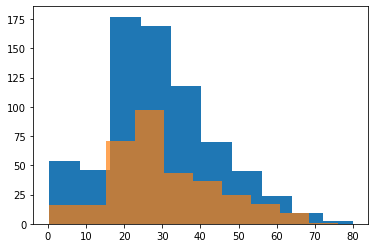

In [22]:
pylab.hist(train['Age']), pylab.hist(test['Age'], alpha=0.7)


In [23]:

train['Age'] = train['Age'].fillna(np.mean(train['Age']))
train['Age'] = train['Age'].astype(int)

test['Age'] = test['Age'].fillna(np.mean(test['Age']))
test['Age'] = test['Age'].astype(int)



In [24]:
train.head(10)

Age  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0   22         0         0         1           0         1        0        1   
1   38         1         0         0           1         0        0        1   
2   26         0         0         1           1         0        1        0   
3   35         1         0         0           1         0        0        1   
4   35         0         0         1           0         1        1        0   
5   29         0         0         1           0         1        1        0   
6   54         1         0         0           0         1        1        0   
7    2         0         0         1           0         1        0        0   
8   27         0         0         1           1         0        1        0   
9   14         0         1         0           1         0        0        1   

   SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0        0        0        0        0        0        1        0        0   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        0        1        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        0        0        1        0        0   
5        0        0        0        0        0        1        0        0   
6        0        0        0        0        0        1        0        0   
7        0        1        0        0        0        0        1        0   
8        0        0        0        0        0        0        0        1   
9        0        0        0        0        0        1        0        0   

   Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0        0        0        0        0           0           0           1   
1        0        0        0        0           1           0           0   
2        0        0        0        0           0           0           1   
3        0        0        0        0           0           0           1   
4        0        0        0        0           0           0           1   
5        0        0        0        0           0           1           0   
6        0        0        0        0           0           0           1   
7        0        0        0        0           0           0           1   
8        0        0        0        0           0           0           1   
9        0        0        0        0           1           0           0   

   Nome_contem_Miss  Nome_contem_Mrs  Nome_contem_Master  Nome_contem_Col  \
0                 0                0                   0                0   
1                 0                1                   0                0   
2                 1                0                   0                0   
3                 0                1                   0                0   
4                 0                0                   0                0   
5                 0                0                   0                0   
6                 0                0                   0                0   
7                 0                0                   1                0   
8                 0                1                   0                0   
9                 0                1                   0                0   

   Nome_contem_Major  Nome_contem_Mr Cabine letra_cabine  numero_cabine  \
0                  0               1     Z0            Z              0   
1                  0               1    C85            C             85   
2                  0               0     Z0            Z              0   
3                  0               1   C123            C            123   
4                  0               1     Z0            Z              0   
5                  0               1     Z0            Z              0   
6                  0               1    E46          

In [25]:
train['Survived'] = train_all['Survived']
train.head(10)

Age  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0   22         0         0         1           0         1        0        1   
1   38         1         0         0           1         0        0        1   
2   26         0         0         1           1         0        1        0   
3   35         1         0         0           1         0        0        1   
4   35         0         0         1           0         1        1        0   
5   29         0         0         1           0         1        1        0   
6   54         1         0         0           0         1        1        0   
7    2         0         0         1           0         1        0        0   
8   27         0         0         1           1         0        1        0   
9   14         0         1         0           1         0        0        1   

   SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0        0        0        0        0        0        1        0        0   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        0        1        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        0        0        1        0        0   
5        0        0        0        0        0        1        0        0   
6        0        0        0        0        0        1        0        0   
7        0        1        0        0        0        0        1        0   
8        0        0        0        0        0        0        0        1   
9        0        0        0        0        0        1        0        0   

   Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0        0        0        0        0           0           0           1   
1        0        0        0        0           1           0           0   
2        0        0        0        0           0           0           1   
3        0        0        0        0           0           0           1   
4        0        0        0        0           0           0           1   
5        0        0        0        0           0           1           0   
6        0        0        0        0           0           0           1   
7        0        0        0        0           0           0           1   
8        0        0        0        0           0           0           1   
9        0        0        0        0           1           0           0   

   Nome_contem_Miss  Nome_contem_Mrs  Nome_contem_Master  Nome_contem_Col  \
0                 0                0                   0                0   
1                 0                1                   0                0   
2                 1                0                   0                0   
3                 0                1                   0                0   
4                 0                0                   0                0   
5                 0                0                   0                0   
6                 0                0                   0                0   
7                 0                0                   1                0   
8                 0                1                   0                0   
9                 0                1                   0                0   

   Nome_contem_Major  Nome_contem_Mr Cabine letra_cabine  numero_cabine  \
0                  0               1     Z0            Z              0   
1                  0               1    C85            C             85   
2                  0               0     Z0            Z              0   
3                  0               1   C123            C            123   
4                  0               1     Z0            Z              0   
5                  0               1     Z0            Z              0   
6                  0               1    E46          

In [26]:
variaveis = ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master',
       'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr', 
       'numero_cabine', 'letra_cabine_A', 'letra_cabine_B',
       'letra_cabine_C', 'letra_cabine_D', 'letra_cabine_E', 'letra_cabine_F',
       'letra_cabine_G', 'letra_cabine_T', 'letra_cabine_Z']


## Criando o modelo

In [27]:
X = train[variaveis]
y = train['Survived']

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados = []

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])
    
    X_treino , X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)    
    modelo.fit(X_treino, y_treino)
    
    p = modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    
    resultados.append(acc)
    print("ACC:", acc)   
    print()

print("Média ACC: ", np.mean(resultados))

Treino: 445
Valid: 446
ACC: 0.7892376681614349

Treino: 446
Valid: 445
ACC: 0.7707865168539326

Treino: 445
Valid: 446
ACC: 0.7937219730941704

Treino: 446
Valid: 445
ACC: 0.7775280898876404

Treino: 445
Valid: 446
ACC: 0.7892376681614349

Treino: 446
Valid: 445
ACC: 0.7775280898876404

Treino: 445
Valid: 446
ACC: 0.7757847533632287

Treino: 446
Valid: 445
ACC: 0.7932584269662921

Treino: 445
Valid: 446
ACC: 0.8004484304932735

Treino: 446
Valid: 445
ACC: 0.7910112359550562

Treino: 445
Valid: 446
ACC: 0.7825112107623319

Treino: 446
Valid: 445
ACC: 0.7887640449438202

Treino: 445
Valid: 446
ACC: 0.7982062780269058

Treino: 446
Valid: 445
ACC: 0.7955056179775281

Treino: 445
Valid: 446
ACC: 0.7802690582959642

Treino: 446
Valid: 445
ACC: 0.7955056179775281

Treino: 445
Valid: 446
ACC: 0.8161434977578476

Treino: 446
Valid: 445
ACC: 0.8089887640449438

Treino: 445
Valid: 446
ACC: 0.7869955156950673

Treino: 446
Valid: 445
ACC: 0.8044943820224719

Média ACC:  0.7907963420164258


In [28]:
X = train[variaveis]
y = train['Survived']

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados2 = []

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])
    
    X_treino , X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)   
    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X_treino, y_treino)
    
    p = modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    
    resultados2.append(acc)
    print("ACC:", acc)   
    print()
    
print("Média ACC: ", np.mean(resultados2))

Treino: 445
Valid: 446
ACC: 0.8071748878923767

Treino: 446
Valid: 445
ACC: 0.7955056179775281

Treino: 445
Valid: 446
ACC: 0.8318385650224215

Treino: 446
Valid: 445
ACC: 0.8112359550561797

Treino: 445
Valid: 446
ACC: 0.8094170403587444

Treino: 446
Valid: 445
ACC: 0.8224719101123595

Treino: 445
Valid: 446
ACC: 0.8094170403587444

Treino: 446
Valid: 445
ACC: 0.8157303370786517

Treino: 445
Valid: 446
ACC: 0.8295964125560538

Treino: 446
Valid: 445
ACC: 0.8179775280898877

Treino: 445
Valid: 446
ACC: 0.8228699551569507

Treino: 446
Valid: 445
ACC: 0.8202247191011236

Treino: 445
Valid: 446
ACC: 0.8452914798206278

Treino: 446
Valid: 445
ACC: 0.802247191011236

Treino: 445
Valid: 446
ACC: 0.8139013452914798

Treino: 446
Valid: 445
ACC: 0.8292134831460675

Treino: 445
Valid: 446
ACC: 0.8565022421524664

Treino: 446
Valid: 445
ACC: 0.8157303370786517

Treino: 445
Valid: 446
ACC: 0.8408071748878924

Treino: 446
Valid: 445
ACC: 0.8224719101123595

Média ACC:  0.8209812566130902


((array([1., 2., 3., 4., 4., 3., 0., 1., 1., 1.]),
  array([0.79550562, 0.80160528, 0.80770494, 0.81380461, 0.81990427,
         0.82600393, 0.83210359, 0.83820325, 0.84430292, 0.85040258,
         0.85650224]),
  <BarContainer object of 10 artists>),
 (array([1., 3., 2., 2., 4., 3., 2., 1., 1., 1.]),
  array([0.77078652, 0.77532221, 0.77985791, 0.78439361, 0.78892931,
         0.79346501, 0.79800071, 0.8025364 , 0.8070721 , 0.8116078 ,
         0.8161435 ]),
  <BarContainer object of 10 artists>))

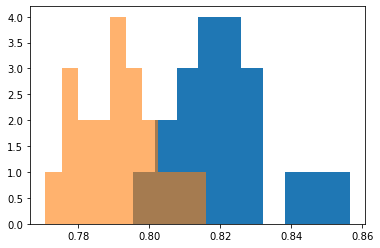

In [29]:
#pylab.hist(resultados2), pylab.hist(resultados, alpha=0.8)
pylab.hist(resultados2), pylab.hist(resultados, alpha=0.6)

## Criar submission

In [30]:
p = modelo.predict(test[variaveis])
p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
#sub = pd.Series(p, index=test_all['PassengerId'], name='Survived')
sub = pd.Series(p, index=test_all['PassengerId'], name='Survived')
sub

PassengerId
892     0
893     1
894     0
895     0
896     1
897     0
898     1
899     0
900     1
901     0
902     0
903     0
904     1
905     0
906     1
907     1
908     0
909     0
910     1
911     1
912     0
913     0
914     1
915     0
916     1
917     0
918     1
919     0
920     0
921     0
922     0
923     0
924     1
925     1
926     0
927     0
928     0
929     1
930     0
931     0
932     0
933     0
934     0
935     1
936     1
937     0
938     0
939     0
940     1
941     0
942     0
943     0
944     1
945     1
946     0
947     0
948     0
949     0
950     0
951     1
952     0
953     0
954     0
955     1
956     1
957     1
958     1
959     0
960     0
961     1
962     1
963     0
964     1
965     1
966     1
967     1
968     0
969     1
970     0
971     1
972     1
973     0
974     0
975     0
976     0
977     0
978     1
979     1
980     1
981     1
982     1
983     0
984     1
985     0
986     0
987     0
988     1
989     0
990     

In [32]:
sub.to_csv('Modelo_6.csv', header=True)